### 1. Radioactive decay chain
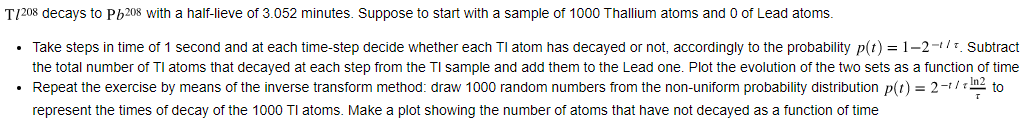

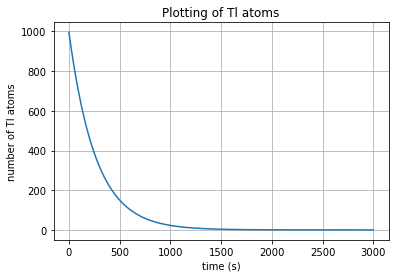

<Figure size 432x288 with 0 Axes>

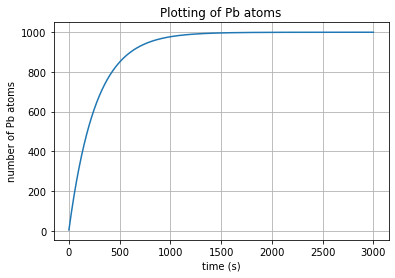

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
N=1000
t=1
start=1
tau=3.052*60
i=0
list_Tl=[]
list_Pb=[]
while(t<3000 or start==1):
    start=0
    Tl=N*(1-2**(-t/tau)) 
    list_Tl.append(1000-Tl)
    list_Pb.append(Tl)
    i=i+1
    t=t+1
t = np.arange(0,i,1)
fig, ax = plt.subplots()
ax.set(xlabel='time (s)', ylabel='number of Tl atoms',
       title='Plotting of Tl atoms')
ax.plot(t,list_Tl)
ax.grid()
plt.figure()
fig, ax1 = plt.subplots()
ax1.set(xlabel='time (s)', ylabel='number of Pb atoms',
       title='Plotting of Pb atoms')
ax1.plot(t,list_Pb)
ax1.grid()
plt.show()

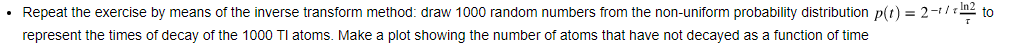

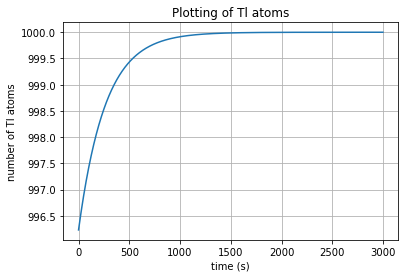

<Figure size 432x288 with 0 Axes>

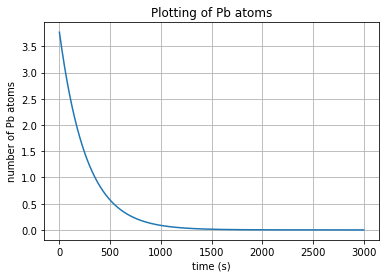

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
N=1000
t=1
start=1
tau=3.052*60
i=0
list_Tl=[]
list_Pb=[]
while(t<3000 or start==1):
    start=0
    Tl=N*(2**(-t/tau)*(np.log(2)/tau))
    list_Tl.append(1000-Tl)
    list_Pb.append(Tl)
    i=i+1
    t=t+1
t = np.arange(0,i,1)
fig, ax = plt.subplots()
ax.set(xlabel='time (s)', ylabel='number of Tl atoms',
       title='Plotting of Tl atoms')
ax.plot(t,list_Tl)
ax.grid()
plt.figure()
fig, ax1 = plt.subplots()
ax1.set(xlabel='time (s)', ylabel='number of Pb atoms',
       title='Plotting of Pb atoms')
ax1.plot(t,list_Pb)
ax1.grid()
plt.show()

### 2. Rutherford Scattering
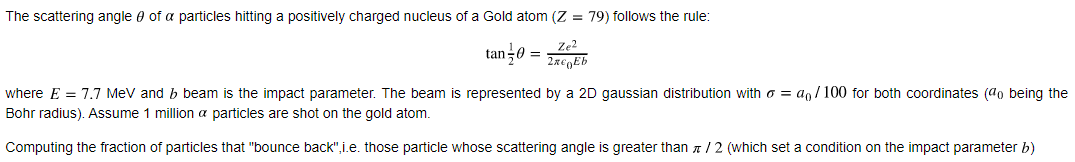

In [116]:
import numpy as np
import math
# number of electrons of Gold
Z =79
# plank constant
h=1.055*(10**(-34))
# mass of electron
m=9.109*(10**(-31))
# cloumb constant
k=8.988*(10**(9))
# load of electron
e=1.602*(10**(-19))
E=7.7*1e6*e
# vacuum permittivity
e0= 8.8541878128*(10**(-12))
# bhor radious
a0=(h**2)/(m*k*(e**2))
N=1000000
x = np.random.normal(0,a0/100,N)
y = np.random.normal(0,a0/100,N)
# cordinat
c = np.sqrt(np.power(x,2)+np.power(y,2))
theta=2*np.arctan((Z*e**2)/(2*math.pi*E*e0)/c)
print ("Percent of particles whose scattering angle is greater than θ > π/2 : ",(float(len(theta[theta>np.pi/2]))/N)*100,"%")

Percent of particles whose scattering angle is greater than θ > π/2 :  0.1558 %


### 3. Monte Carlo integration: hit/miss vs mean value method
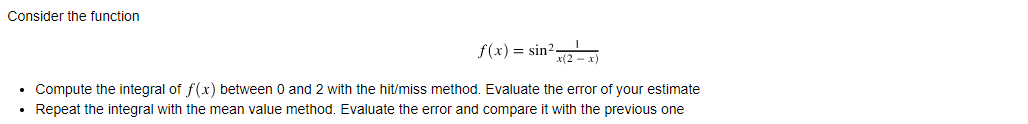

In [3]:
import numpy as np
def f(x):
    return (np.sin(1/(x*(2-x))))**2
N=10000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
result=2*count/N
error = 0.6745*math.sqrt(result*(2-result)/N)
print("Result of Integral :",result,"Error :",error)

Result of Integral : 1.4442 Error : 0.006043032021705578


Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [51]:
import math
def f(x):
    return (math.sin(1/(x*(2-x))))**2
def integral(starting,ending,N):
    width=(float(ending)-float(starting))/N
    Sum=0
    for i in range(N):
        height=f(starting+i*width)
        area=height*width
        Sum+=area
    return Sum
result=integral(0.0001,2,10000)
error = 0.6745*math.sqrt(result*(2-result)/N)
print("Result of Integral :",result,"Error :",error)

Result of Integral : 1.4510508516883263 Error : 0.01903659752329273


### 4. Monte Carlo integration in high dimension
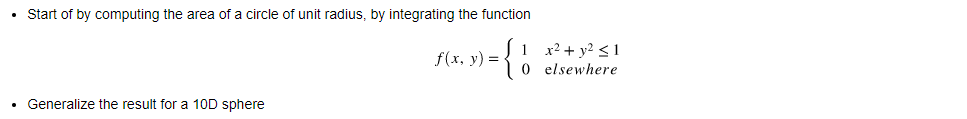

In [119]:
import math
def f(x):
    return math.sqrt(1-(x**2))
def integral(starting,ending,N):
    width=(float(ending)-float(starting))/N
    Sum=0
    for i in range(N):
        height=f(starting+i*width)
        area=height*width
        Sum+=area
    return 2*Sum
result=integral(-1,1,10000)
error = 0.6745*math.sqrt(result*(4-result)/N)
print("Result of Integral :",result,"Error :",error)

Result of Integral : 3.141589327430582 Error : 0.011076542411393666


Generalize the result for a 10D sphere

In [52]:
def f(z):
    y=sum(x**2 for x in z)
    if y <=1: return 1
    else: return 0
N = 1000000
count=0
D=10
for i in range(N):
    x1=np.random.uniform(-1,1,D)
    if f(x1)==1: count+=1
volume=2**D
result=volume*(float(count)/float(N))
error = 0.6745*np.sqrt(result*(volume-result)/N)
print("Result of Integral :",result,"Error :",error)

Result of Integral : 2.555904 Error : 0.03446367007609161


### 5. Monte Carlo integration with importance sampling
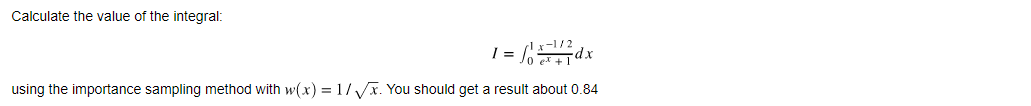

In [38]:
import numpy as np
N = 10000
def function(x):
    return x**(-1/2)/(np.exp(x) + 1) 
def stp(x):
    return x*x/5
def w_function(x):
    if (x > 0):
        return 1/np.sqrt(x)
random=np.random.uniform(0,2,N)
dividing = np.array([function(i) for i in stp(random)])
divider = np.array([w_function(i) for i in stp(random)])
result = 2/N * np.sum(dividing/divider)
print(result)

0.8696471652478235
